<a href="https://colab.research.google.com/github/RouKou76/BigData2026/blob/main/lab2/lab2_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [40]:
!git clone https://github.com/RouKou76/BigData2026.git
# !git clone https://gitlab.com/roukou761/BigData2026.git
# !git clone https://gitverse.ru/RouKou/BigData2026.git


Cloning into 'BigData2026'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 1), reused 29 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 15.78 MiB | 15.61 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [11]:
# file_path = "/content/drive/MyDrive/bd/imdb_movies.csv"
# file_path = "/content/drive/MyDrive/Colab Notebooks/imdb_movies.csv"

file_path = "/content/BigData2026/lab2/imdb_movies.csv"
df = pd.read_csv(file_path)

**Вывести первые 5 строк файла**

In [12]:
# print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

In [13]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


**Выведите основную статистику по числовым колонкам (score, budget_x, revenue) - среднее значение, медиана, минимальное и максимальное значения, стандартное отклонение.**

In [14]:
# Вывод сводной статистики
# df[['score', 'budget_x', 'revenue']].describe()

In [15]:
# df[['score', 'budget_x', 'revenue']].mean()
# df[['score', 'budget_x', 'revenue']].median()
# df[['score', 'budget_x', 'revenue']].min()
# df[['score', 'budget_x', 'revenue']].max()
# df[['score', 'budget_x', 'revenue']].std()

In [16]:
num_cols = ["score", "budget_x", "revenue"]
stats = {}

for col in num_cols:
    s = df[col].dropna()
    stats[col] = {
        "mean": s.mean(),     # Среднее значение
        "median": s.median(), # Медиана
        "min": s.min(),       # Минимальное значение
        "max": s.max(),       # Максимальное значение
        "std": s.std(ddof=1)  # Стандартное отклонение выборки
    }

stats_df = pd.DataFrame(stats).T
print("\nСтатистика:")
print(stats_df)


Статистика:
                  mean       median  min           max           std
score     6.349705e+01         65.0  0.0  1.000000e+02  1.353701e+01
budget_x  6.488238e+07   50000000.0  1.0  4.600000e+08  5.707565e+07
revenue   2.531401e+08  152934876.5  0.0  2.923706e+09  2.777880e+08


**Найти количество уникальных жанров.**

In [17]:
g_split = df['genre'].dropna().str.split(r',\s*').explode()
print('Кол-во уникальных жанров: ', g_split.nunique())

Кол-во уникальных жанров:  19


In [18]:
print('Уникальные значения: ', g_split.unique())

Уникальные значения:  ['Drama' 'Action' 'Science Fiction' 'Adventure' 'Animation' 'Family'
 'Fantasy' 'Comedy' 'Thriller' 'Crime' 'Horror' 'Mystery' 'History' 'War'
 'Documentary' 'Romance' 'Music' 'Western' 'TV Movie']


**Определить 3 самых популярных жанра.**

In [19]:
g_split.value_counts().head(3)

,count
genre,
Drama,3812
Comedy,2943
Action,2752


**Вывести топ-5 фильмов с наивысшим рейтингом (среди тех, у которых больше 100 голосов).**

In [20]:
data = pd.DataFrame(df)


In [21]:
# filter_df = data[]
data['score'].value_counts().head(5)

,count
score,
68.0,474
65.0,445
69.0,437
63.0,433
66.0,421


In [22]:
data.nlargest(5, "score")

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
277,Orgasm Lecture 2,02/20/2020,100.0,Drama,"Yuner, Liu Ren, and Zhou Xian are college girl...","Min Do-yoon, , Park Soo-bin-III, , Hong Sae-he...",오르가즘 특강 2,Released,Korean,201000000.0,1.569324e+09,KR
443,El asistente,03/01/2023,100.0,Comedy,We don't have an overview translated in Englis...,"Rodrigo Noya, Miguel, Luis Cao, Jimmy, Florenc...",El asistente,Released,"Spanish, Castilian",201000000.0,1.569324e+09,AR
934,Female Boss Hooker,08/31/2020,100.0,"Drama, Romance",Ji-cheol is a job seeker who only plays and ea...,"Ye Seul, , Lee Sul-ah-I, , Min Do-yoon, , Jo Y...",여사장 후리꾼,Released,Korean,201000000.0,1.569324e+09,KR
1776,Porno document: Toruko tokkyû bin,02/26/1982,100.0,NaN,Pinku from 1982.,"Jun Miho, , Rumi Kagawa, , Miyuki Oka, , Kayok...",ポルノドキュメント トルコ特急便,Released,Japanese,201000000.0,1.569324e+09,JP
4887,Pretty Young Sister 4,01/15/2021,100.0,"Drama, Romance",Jeong-woo who is tired of instant food and liv...,"Ha Yeon, , Shin Yeon-ho, , Kang Seo, , Yoon Da...",예쁜 여동생 4,Released,Korean,201000000.0,1.569324e+09,KR


**Создайте список оценок (score), найдите средний рейгинг, медиану и стандартное отклонение.**

In [23]:
num_cols = ["score"]
stats = {}

for col in num_cols:
    s = df[col].dropna()
    stats[col] = {
        "mean": s.mean(),     # Среднее значение
        "median": s.median(), # Медиана
        "std": s.std(ddof=1)  # Стандартное отклонение выборки
    }

stats_df = pd.DataFrame(stats).T
print("\nСтатистика:")
print(stats_df)


Статистика:
            mean  median        std
score  63.497052    65.0  13.537012


**Постройте гистограмму распределений рейтинга фильмов**

array([[<Axes: title={'center': 'score'}>]], dtype=object)

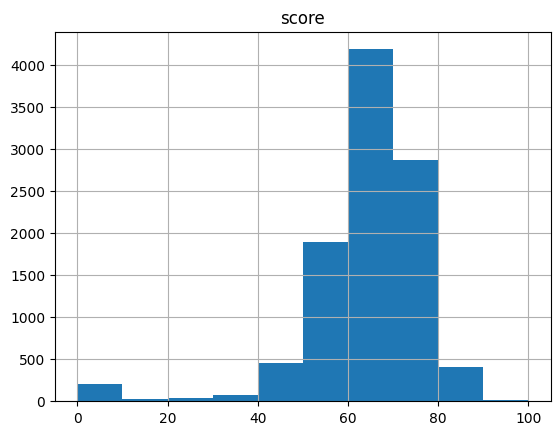

In [24]:
data.hist('score')


**Рассчитайте долю фильмов с бюджетом свыше $10 млн долларов.**

filtered_df = data[data["budget_x"] > 10000000]

In [25]:
filtered_df = data[data["budget_x"] > 10**7]

In [26]:
filtered_df.value_counts()

,,,,,,,,,,,,count
names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,
솔라 플라워,04/06/2023,0.0,Romance,We don't have an overview translated in English. Help us expand our database by adding one.,"Oh Sung-hyun, , Seo Ji-hee,",솔라 플라워,Released,Korean,181600000.0,175269998.8,KR,1
#FBF,03/31/2022,53.0,Drama,Teenage Annie inadvertently takes her mother's laptop instead of her own to visit her father in New Jersey. She quickly realizes that the laptop allows her to pretend to be her mother. She uses this to try to restore her parents' marriage ....,"Cree Cicchino, Annie, Gavin Warren, Christian, Ashley Judd, , Maria Canals-Barrera, , Emily Skinner, , Ciara Riley Wilson, , Kylee Russell, , David Barrera,",#FBF,Released,English,119600000.0,362461687.2,CA,1
'71,11/07/2014,68.0,"Thriller, Action, Drama, War",A young British soldier must find his way back to safety after his unit accidentally abandons him during a riot in the streets of Belfast.,"Jack O'Connell, Gary Hook, Sean Harris, Captain Sandy Browning, Paul Anderson, Sergeant Leslie Lewis, Sam Reid, Lt. Armitage, Sam Hazeldine, C.O., Barry Keoghan, Sean Bannon, Charlie Murphy, Brigid, Richard Dormer, Eamon, Killian Scott, Quinn",'71,Released,English,11000000.0,3200000.0,AU,1
*batteries not included,03/31/1988,67.0,"Science Fiction, Comedy, Family, Fantasy","In a soon to be demolished block of apartments, the residents resist the criminal methods used to force them to leave so a greedy tycoon can build his new skyscraper. When tiny mechanical aliens land for a recharge, they decide to stay and help out.","Hume Cronyn, Frank Riley, Jessica Tandy, Faye Riley, Frank McRae, Harry Noble, Elizabeth Peña, Marisa Esteval, Michael Carmine, Carlos, Dennis Boutsikaris, Mason Baylor, Tom Aldredge, Sid Hogenson, Jane Hoffman, Muriel Hogenson, John DiSanti, Gus",*batteries not included,Released,English,25000000.0,65088797.0,AU,1
"...Watch Out, We're Mad",03/23/2022,62.0,"Comedy, Action","Estranged, quarreling brothers Carezza and Sorriso have to put aside their differences to reclaim their father's beloved dune buggy from predatory real estate developer Torsillo, with the help of beautiful circus performer Miriam, whose family business is threatened by Torsillo's enforcers.","Edoardo Pesce, Carezza, Alessandro Roja, Sorriso, Alessandra Mastronardi, Miriam, Christian De Sica, Torsillo, Francesco Bruni, Raniero, Massimiliano Rossi, Scajone, Michael Schermi, Armandino, Gabriele Cristini, Young Carezza, Christian Monaldi, Young Sorriso",...altrimenti ci arrabbiamo!,Released,Italian,147000000.0,296181163.0,IT,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12 Strong,01/16/2018,62.0,"War, Drama, Action, History",A team of special forces head into Afghanistan in the aftermath of the September 11th attacks in an attempt to dismantle the Taliban.,"Chris Hemsworth, Captain Mitch Nelson, Michael Shannon, Chief Warrant Officer Hal Spencer, Michael Peña, Sgt First Class Sam Diller, Navid Negahban, General Dostum, Trevante Rhodes, Sgt First Class Ben Milo, Geoff Stults, Sean Coffers, Thad Luckinbill, Vern Michaels, Austin Stowell, Fred Falls, Ben O'Toole, Scott Black",12 Strong,Released,English,35000000.0,71118378.0,AU,1
12 Rounds 3: Lockdown,09/11/2015,59.0,"Action, Thriller, Crime","Lockdown Follows a police officer who returns to duty after recovering from a gun shot wound to discover incriminating evidence of illegal activities against those closest to him. He quickly finds himself trapped inside his own precinct, hunted and in search of the truth, as the crooked cops stop at nothing to recover the evidence.","Jonathan Good, John Shaw, Roger Cross, Tyler Burke, Daniel Cudmore, Gideon, Lochlyn Munro, Darrow, Sarah Smyth, Officer Jenny Taylor, Lee Tomaschefski, Hot Brunette, Rebecca Marshall, Captain Matthews, Courtney Hojenski, Female Trainee, Avery Konrad, Girlfriend",12 Rounds 3: Lockdown,Released,English,104600000.0,414937351.4,US,1
12 Rounds,03/19/2009,59.0,"A

In [27]:
len(filtered_df)/len(data)*100

79.32796227156612

**Подсчитайте среднюю прибыльность фильма (отношение прибыли к бюджету), исключив фильмы с нулевым бюджетом.**

In [28]:
# revenue_df = data[data["budget_x"] > 0]
revenue_df = data[data["budget_x"] > 10]

In [29]:
profit_df = revenue_df['revenue']/revenue_df['budget_x']
profit_df.mean()

np.float64(1512.2441036427633)

**Найти самый популярный год (по количеству вышедших фильмов**